# Beginning Gini Index Score Calculation

## What is a gini index?
The gini index or gini coefficient measures "the distribution of income across a population developed by the Italian statistician Corrado Gini in 1912. It is often used as a gauge of economic inequality, measuring income distribution or, less commonly, wealth distribution among a population. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with 0 representing perfect equality and 1 representing perfect inequality." - *Investopedia*

**Key Point:**
A higher Gini index indicates greater inequality, with high income individuals receiving much larger percentages of the total income of the population.

In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Income/Income_Asian_2.csv")
df

,Label,"Albany County, New York!!Estimate","Allegany County, New York!!Estimate","Bronx County, New York!!Estimate","Broome County, New York!!Estimate","Cattaraugus County, New York!!Estimate","Cayuga County, New York!!Estimate","Chautauqua County, New York!!Estimate","Chemung County, New York!!Estimate","Chenango County, New York!!Estimate",...,"Sullivan County, New York!!Estimate","Tioga County, New York!!Estimate","Tompkins County, New York!!Estimate","Ulster County, New York!!Estimate","Warren County, New York!!Estimate","Washington County, New York!!Estimate","Wayne County, New York!!Estimate","Westchester County, New York!!Estimate","Wyoming County, New York!!Estimate","Yates County, New York!!Estimate"
0,Total:,"6,271",155,"15,304","2,484",191,119,240,356,51,...,288,80,"3,982",889,228,109,236,"18,966",46,30
1,"Less than $10,000",431,29,"1,010",642,40,0,33,10,0,...,34,0,988,62,10,11,0,830,28,0
2,"$10,000 to $14,999",290,0,797,52,9,12,18,0,8,...,6,0,261,55,0,0,30,473,0,0
3,"$15,000 to $19,999",167,8,"1,032",135,0,0,42,0,5,...,14,0,150,21,26,0,0,394,0,5
4,"$20,000 to $24,999",141,0,748,125,0,0,21,0,0,...,27,0,88,19,18,0,18,311,0,2
5,"$25,000 to $29,999",187,7,882,118,2,0,0,0,0,...,0,0,185,0,7,0,0,432,4,6
6,"$30,000 to $34,999",386,18,800,43,29,14,15,20,0,...,5,12,309,57,0,6,0,334,0,11
7,"$35,000 to $39,999",83,0,574,59,0,0,0,57,7,...,0,27,151,45,36,15,0,279,9,0
8,"$40,000 to $44,999",180,0,485,104,0,7,0,0,14,...,10,0,115,17,0,0,0,283,5,0
9,"$45,000 to $49,999",134,2,525,78,8,0,18,0,0,...,9,0,52,32,6,0,28,379,0,0


In [3]:
df_asian = df #making a copy of our orginial df
df_asian.head()

,Label,"Albany County, New York!!Estimate","Allegany County, New York!!Estimate","Bronx County, New York!!Estimate","Broome County, New York!!Estimate","Cattaraugus County, New York!!Estimate","Cayuga County, New York!!Estimate","Chautauqua County, New York!!Estimate","Chemung County, New York!!Estimate","Chenango County, New York!!Estimate",...,"Sullivan County, New York!!Estimate","Tioga County, New York!!Estimate","Tompkins County, New York!!Estimate","Ulster County, New York!!Estimate","Warren County, New York!!Estimate","Washington County, New York!!Estimate","Wayne County, New York!!Estimate","Westchester County, New York!!Estimate","Wyoming County, New York!!Estimate","Yates County, New York!!Estimate"
0,Total:,"6,271",155,"15,304","2,484",191,119,240,356,51,...,288,80,"3,982",889,228,109,236,"18,966",46,30
1,"Less than $10,000",431,29,"1,010",642,40,0,33,10,0,...,34,0,988,62,10,11,0,830,28,0
2,"$10,000 to $14,999",290,0,797,52,9,12,18,0,8,...,6,0,261,55,0,0,30,473,0,0
3,"$15,000 to $19,999",167,8,"1,032",135,0,0,42,0,5,...,14,0,150,21,26,0,0,394,0,5
4,"$20,000 to $24,999",141,0,748,125,0,0,21,0,0,...,27,0,88,19,18,0,18,311,0,2


Since the incomes are in ranges, we'll convert them to midpoint amounts to make them easier to work with

In [4]:
list_values = df_asian.iloc[1:,0]
list_values

1            Less than $10,000
2           $10,000 to $14,999
3           $15,000 to $19,999
4           $20,000 to $24,999
5           $25,000 to $29,999
6           $30,000 to $34,999
7           $35,000 to $39,999
8           $40,000 to $44,999
9           $45,000 to $49,999
10          $50,000 to $59,999
11          $60,000 to $74,999
12          $75,000 to $99,999
13        $100,000 to $124,999
14        $125,000 to $149,999
15        $150,000 to $199,999
16            $200,000 or more
Name: Label, dtype: object

# Data Cleaning

In [5]:
#new values for each income are the midpoint for the ranges
new_amounts = [4999, 12499, 17499, 22499, 27499, 32499, 37499, 42499, 47499, 54999, 67499, 
              87499, 112499, 137499, 174999, 200000]

for i in range(0,16):
    df_asian.iloc[i+1,0] = new_amounts[i]
df_asian.head()

,Label,"Albany County, New York!!Estimate","Allegany County, New York!!Estimate","Bronx County, New York!!Estimate","Broome County, New York!!Estimate","Cattaraugus County, New York!!Estimate","Cayuga County, New York!!Estimate","Chautauqua County, New York!!Estimate","Chemung County, New York!!Estimate","Chenango County, New York!!Estimate",...,"Sullivan County, New York!!Estimate","Tioga County, New York!!Estimate","Tompkins County, New York!!Estimate","Ulster County, New York!!Estimate","Warren County, New York!!Estimate","Washington County, New York!!Estimate","Wayne County, New York!!Estimate","Westchester County, New York!!Estimate","Wyoming County, New York!!Estimate","Yates County, New York!!Estimate"
0,Total:,"6,271",155,"15,304","2,484",191,119,240,356,51,...,288,80,"3,982",889,228,109,236,"18,966",46,30
1,4999,431,29,"1,010",642,40,0,33,10,0,...,34,0,988,62,10,11,0,830,28,0
2,12499,290,0,797,52,9,12,18,0,8,...,6,0,261,55,0,0,30,473,0,0
3,17499,167,8,"1,032",135,0,0,42,0,5,...,14,0,150,21,26,0,0,394,0,5
4,22499,141,0,748,125,0,0,21,0,0,...,27,0,88,19,18,0,18,311,0,2


Need to rename columns so it contains county only, and we need to make the amounts of people into integers since they are currently strings. To make those numbers integers, we must first remove the commas - then we can convert type.

In [6]:
# want to delete everything after the county name in the string
column_list = []
for i in range(0,len(df_asian.columns)):
    if i != 0: #we don't want to change the 1st column at all
        comma = df_asian.columns[i].find(",") #finds where the commas are in the string
        col_name = df_asian.columns[i][0:comma] #keeps the name of the county onlyy
        column_list = column_list + [col_name] #puts the corrected names into the list we made
column_list 

['Albany County',
 'Allegany County',
 'Bronx County',
 'Broome County',
 'Cattaraugus County',
 'Cayuga County',
 'Chautauqua County',
 'Chemung County',
 'Chenango County',
 'Clinton County',
 'Columbia County',
 'Cortland County',
 'Delaware County',
 'Dutchess County',
 'Erie County',
 'Essex County',
 'Franklin County',
 'Fulton County',
 'Genesee County',
 'Greene County',
 'Hamilton County',
 'Herkimer County',
 'Jefferson County',
 'Kings County',
 'Lewis County',
 'Livingston County',
 'Madison County',
 'Monroe County',
 'Montgomery County',
 'Nassau County',
 'New York County',
 'Niagara County',
 'Oneida County',
 'Onondaga County',
 'Ontario County',
 'Orange County',
 'Orleans County',
 'Oswego County',
 'Otsego County',
 'Putnam County',
 'Queens County',
 'Rensselaer County',
 'Richmond County',
 'Rockland County',
 'St. Lawrence County',
 'Saratoga County',
 'Schenectady County',
 'Schoharie County',
 'Schuyler County',
 'Seneca County',
 'Steuben County',
 'Suffolk Co

In [7]:
#we'll rename our columns now
for i in range(0,len(column_list)):
    df_asian = df_asian.rename(columns = {df_asian.columns[i+1]: column_list[i]}) #renames the old columns to our corrected names
df_asian.head() 

,Label,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Chenango County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
0,Total:,"6,271",155,"15,304","2,484",191,119,240,356,51,...,288,80,"3,982",889,228,109,236,"18,966",46,30
1,4999,431,29,"1,010",642,40,0,33,10,0,...,34,0,988,62,10,11,0,830,28,0
2,12499,290,0,797,52,9,12,18,0,8,...,6,0,261,55,0,0,30,473,0,0
3,17499,167,8,"1,032",135,0,0,42,0,5,...,14,0,150,21,26,0,0,394,0,5
4,22499,141,0,748,125,0,0,21,0,0,...,27,0,88,19,18,0,18,311,0,2


In [8]:
print(f" {df_asian.iloc[0,1]} is {type(df_asian.iloc[0,1])}")

 6,271 is <class 'str'>


Note: some numbers are strings and some are type numpy.int64. Need to convert the strings only - so filter through and only change the ones that are strings.

In [9]:
#some rows may have numbers with commas, we must delete the commas
#only deleted commas in Bronx at the moment
for i in range(1,len(df_asian.columns)): #searching per column
    for j in range(0,len(df_asian)): #going into that column and looking at all the rows in it
        if type(df_asian.iloc[j,i]) == str: #only want to change the strings
            if df_asian.iloc[j,i].find(",") != -1:
                df_asian.iloc[j,i] = df_asian.iloc[j,i].replace(",","")
                df_asian.iloc[j,i] = int(df_asian.iloc[j,i]) #changes the string to an integer
            else:
                df_asian.iloc[j,i] = int(df_asian.iloc[j,i])
print(f" {df_asian.iloc[0,1]} is {type(df_asian.iloc[0,1])}")
df_asian

 6271 is <class 'numpy.int64'>


,Label,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Chenango County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
0,Total:,6271,155,15304,2484,191,119,240,356,51,...,288,80,3982,889,228,109,236,18966,46,30
1,4999,431,29,1010,642,40,0,33,10,0,...,34,0,988,62,10,11,0,830,28,0
2,12499,290,0,797,52,9,12,18,0,8,...,6,0,261,55,0,0,30,473,0,0
3,17499,167,8,1032,135,0,0,42,0,5,...,14,0,150,21,26,0,0,394,0,5
4,22499,141,0,748,125,0,0,21,0,0,...,27,0,88,19,18,0,18,311,0,2
5,27499,187,7,882,118,2,0,0,0,0,...,0,0,185,0,7,0,0,432,4,6
6,32499,386,18,800,43,29,14,15,20,0,...,5,12,309,57,0,6,0,334,0,11
7,37499,83,0,574,59,0,0,0,57,7,...,0,27,151,45,36,15,0,279,9,0
8,42499,180,0,485,104,0,7,0,0,14,...,10,0,115,17,0,0,0,283,5,0
9,47499,134,2,525,78,8,0,18,0,0,...,9,0,52,32,6,0,28,379,0,0


## Columns of Gini Calculation
<img src=columns_gini.jpg width ='600'>

## Process for calculations

### Fraction of Income:
fraction = household income / sum of all incomes (so the sum of the 1st column)

### Fraction of Pop:
fraction = number of people with specific income/ total population of the county

The total population number for each county is the 1st row of every column

### % Pop Richer:
fraction = (number of people richer than specific income) / (total population of the county) **or** (sum of people above income group) / (total population of county)

For the 1st row of this category, you could do 1-(fraction of pop) since everyone would be richer than the 1st group. Last row in category should be zero since no one is richer than the last group.

### Score
score = fraction of income * (fraction of population + 2 * fraction population richer)

In [10]:
#building rows of our columns

total_income = df_asian.iloc[1:,0].sum() #total income amount e.g. total amount of income
fraction_income = [round(df_asian.iloc[i+1,0]/total_income,2) for i in range(0,16)] #fraction of income of the total amount of income
fraction_pop = [] #will be a list of the fractions of people at a specific income level
dict_fraction_pop = {} #will make fraction population a dictionary separated by county

#set up a for loop that goes through each row and column
for i in range(1,len(df_asian.columns)): #searching per column
    for j in range(1,len(df_asian)): #going into that column and looking at all the rows in it
        fractions = df_asian.iloc[j,i]/df_asian.iloc[0,i]
        fraction_pop = fraction_pop + [fractions]
    dict_fraction_pop[column_list[i-1]] = fraction_pop
    fraction_pop = [] #resets fraction population list, so each county gets its own
    

#population richer dictionary and loop
dict_fraction_richer = {}
fraction_rich = [] #where fractions will live
for i in range(1,len(df_asian.columns)): #searching per column
    for j in range(1,len(df_asian)): #going into that column and looking at all the rows in it
        if j == 16:
            fractions = 0
            fraction_rich = fraction_rich + [fractions]
        else:
            fractions = (df_asian.iloc[j+1:,i].sum())/df_asian.iloc[0,i]
            fraction_rich = fraction_rich + [fractions]
    dict_fraction_richer[column_list[i-1]] = fraction_rich
    fraction_rich = [] #resets fraction population list, so each county gets its own
    

#score dictionary and loop
scores = {} #the scores for each county
for i in range(1,len(df_asian.columns)):
    for j in range(1,len(df_asian)):
        scores[column_list[i-1]] = fraction_income[j-1] * (dict_fraction_pop[column_list[i-1]][j-1] + 
        2 * dict_fraction_richer[column_list[i-1]][j-1])

In [11]:
print(dict_fraction_richer["Albany County"])
scores

[0.93127092967628766, 0.88502631159304734, 0.85839579014511247, 0.83591133790464045, 0.80609153245096477, 0.74453835114016909, 0.73130282251634504, 0.70259926646467863, 0.68123106362621588, 0.62366448732259605, 0.5404241747727635, 0.37856801148142244, 0.25992664646786795, 0.19358953914846116, 0.096794769574230582, 0]


{'Albany County': 0.018391006219103809,
 'Allegany County': 0.018387096774193548,
 'Bronx County': 0.01102456874019864,
 'Broome County': 0.013079710144927537,
 'Cattaraugus County': 0.0059685863874345546,
 'Cayuga County': 0.0047899159663865546,
 'Chautauqua County': 0.022166666666666668,
 'Chemung County': 0.033623595505617977,
 'Chenango County': 0.0,
 'Clinton County': 0.0,
 'Columbia County': 0.023903225806451611,
 'Cortland County': 0.0,
 'Delaware County': 0.011176470588235295,
 'Dutchess County': 0.046825732407127757,
 'Erie County': 0.018724127278344146,
 'Essex County': 0.0,
 'Franklin County': 0.0,
 'Fulton County': 0.03619047619047619,
 'Genesee County': 0.072170542635658919,
 'Greene County': 0.011728395061728394,
 'Hamilton County': 0.0,
 'Herkimer County': 0.037445255474452557,
 'Jefferson County': 0.010670826833073323,
 'Kings County': 0.019775173787770054,
 'Lewis County': 0.0,
 'Livingston County': 0.029118773946360151,
 'Madison County': 0.037173913043478266,
 'Monro

### Now we can get the gini index for each county
The gini is 1 - score

In [12]:
gini_asian = {}
for i in range(1,len(df_asian.columns)):
    gini_asian[column_list[i-1]] = 1 - scores[column_list[i-1]]
gini_asian

{'Albany County': 0.98160899378089617,
 'Allegany County': 0.98161290322580641,
 'Bronx County': 0.98897543125980136,
 'Broome County': 0.98692028985507241,
 'Cattaraugus County': 0.99403141361256542,
 'Cayuga County': 0.99521008403361344,
 'Chautauqua County': 0.97783333333333333,
 'Chemung County': 0.966376404494382,
 'Chenango County': 1.0,
 'Clinton County': 1.0,
 'Columbia County': 0.97609677419354834,
 'Cortland County': 1.0,
 'Delaware County': 0.98882352941176466,
 'Dutchess County': 0.95317426759287227,
 'Erie County': 0.98127587272165584,
 'Essex County': 1.0,
 'Franklin County': 1.0,
 'Fulton County': 0.96380952380952378,
 'Genesee County': 0.92782945736434108,
 'Greene County': 0.9882716049382716,
 'Hamilton County': 1.0,
 'Herkimer County': 0.96255474452554746,
 'Jefferson County': 0.9893291731669267,
 'Kings County': 0.98022482621222995,
 'Lewis County': 1.0,
 'Livingston County': 0.9708812260536398,
 'Madison County': 0.96282608695652172,
 'Monroe County': 0.976611083864

### For the other two subgroups, we'll write a function that follows the logic as outlined above

In [13]:
# function for the other subgroups
def gini_index(df):
    
    df_change = df #making a copy of our orginial df
    
    #new values for each income are the midpoint for the ranges
    new_amounts = [4999, 12499, 17499, 22499, 27499, 32499, 37499, 42499, 47499, 54999, 67499, 
              87499, 112499, 137499, 174999, 200000]
    for i in range(0,16):
        df_change.iloc[i+1,0] = new_amounts[i]
     
    # want to delete everything after the county name in the string
    column_list = []
    for i in range(0,len(df_change.columns)):
        if i != 0: #we don't want to change the 1st column at all
            comma = df_change.columns[i].find(",") #finds where the commas are in the string
            col_name = df_change.columns[i][0:comma] #keeps the name of the county onlyy
            column_list = column_list + [col_name] #puts the corrected names into the list we made
            
    #we'll rename our columns now
    for i in range(0,len(column_list)):
        df_change = df_change.rename(columns = {df_change.columns[i+1]: column_list[i]}) 
        
    #some rows may have numbers with commas, we must delete the commas
    #only deleted commas in Bronx at the moment
    for i in range(1,len(df_change.columns)): #searching per column
        for j in range(0,len(df_change)): #going into that column and looking at all the rows in it
            if type(df_change.iloc[j,i]) == str: #only want to change the strings
                if df_change.iloc[j,i].find(",") != -1:
                    df_change.iloc[j,i] = df_change.iloc[j,i].replace(",","")
                    df_change.iloc[j,i] = int(df_change.iloc[j,i]) #changes the string to an integer
                else:
                    df_change.iloc[j,i] = int(df_change.iloc[j,i])     

    #building rows of our columns

    total_income = df_change.iloc[1:,0].sum() #total income amount e.g. total amount of income
    fraction_income = [round(df_change.iloc[i+1,0]/total_income,2) for i in range(0,16)] #fraction of income of the total amount of income
    fraction_pop = [] #will be a list of the fractions of people at a specific income level
    dict_fraction_pop = {} #will make fraction population a dictionary separated by county

    #set up a for loop that goes through each row and column
    for i in range(1,len(df_change.columns)): #searching per column
        for j in range(1,len(df_change)): #going into that column and looking at all the rows in it
            fractions = df_change.iloc[j,i]/df_change.iloc[0,i]
            fraction_pop = fraction_pop + [fractions]
        dict_fraction_pop[column_list[i-1]] = fraction_pop
        fraction_pop = [] #resets fraction population list, so each county gets its own
    

    #population richer dictionary and loop
    dict_fraction_richer = {}
    fraction_rich = [] #where fractions will live
    for i in range(1,len(df_change.columns)): #searching per column
        for j in range(1,len(df_change)): #going into that column and looking at all the rows in it
            if j == 16:
                fractions = 0
                fraction_rich = fraction_rich + [fractions]
            else:
                fractions = (df_change.iloc[j+1:,i].sum())/df_change.iloc[0,i]
                fraction_rich = fraction_rich + [fractions]
        dict_fraction_richer[column_list[i-1]] = fraction_rich
        fraction_rich = [] #resets fraction population list, so each county gets its own


    #score dictionary and loop
    scores = {} #the scores for each county
    for i in range(1,len(df_change.columns)):
        for j in range(1,len(df_change)):
            scores[column_list[i-1]] = fraction_income[j-1] * (dict_fraction_pop[column_list[i-1]][j-1] + 
            2 * dict_fraction_richer[column_list[i-1]][j-1])  

    gini_change = {}
    for i in range(1,len(df_asian.columns)):
        gini_change[column_list[i-1]] = 1 - scores[column_list[i-1]]            

    gini = gini_change
    return gini


df2 = pd.read_csv("Income/Income_Black_2.csv")
df3 = pd.read_csv("Income/Income_Hispanic_2.csv")

gini_black = gini_index(df2)
gini_hispanic = gini_index(df3)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in long_scalars


In [14]:
gini_black

{'Albany County': 0.9967442937479325,
 'Allegany County': 1.0,
 'Bronx County': 0.99556841867908863,
 'Broome County': 0.99906160644658171,
 'Cattaraugus County': 1.0,
 'Cayuga County': 0.99648870636550313,
 'Chautauqua County': 1.0,
 'Chemung County': 0.99974132062627641,
 'Chenango County': 0.94699999999999995,
 'Clinton County': 1.0,
 'Columbia County': 0.99866510538641684,
 'Cortland County': 1.0,
 'Delaware County': 0.99101351351351352,
 'Dutchess County': 0.9903192142418662,
 'Erie County': 0.9970187439613527,
 'Essex County': 1.0,
 'Franklin County': 1.0,
 'Fulton County': 0.99542168674698794,
 'Genesee County': 1.0,
 'Greene County': 1.0,
 'Hamilton County': nan,
 'Herkimer County': 1.0,
 'Jefferson County': 0.9999018087855297,
 'Kings County': 0.99213201274458307,
 'Lewis County': 1.0,
 'Livingston County': 1.0,
 'Madison County': 0.98615384615384616,
 'Monroe County': 0.99707795414462086,
 'Montgomery County': 1.0,
 'Nassau County': 0.9713920570483493,
 'New York County': 0.9

In [15]:
gini_hispanic

{'Albany County': 0.99151116951379759,
 'Allegany County': 1.0,
 'Bronx County': 0.99639021134593997,
 'Broome County': 0.99536585365853658,
 'Cattaraugus County': 1.0,
 'Cayuga County': 0.99960498960498956,
 'Chautauqua County': 0.99932570977917978,
 'Chemung County': 0.99499176276771006,
 'Chenango County': 0.98237681159420287,
 'Clinton County': 1.0,
 'Columbia County': 0.99399494310998737,
 'Cortland County': 1.0,
 'Delaware County': 0.99465863453815262,
 'Dutchess County': 0.99053701168790143,
 'Erie County': 0.9970363532183103,
 'Essex County': 0.99475862068965515,
 'Franklin County': 1.0,
 'Fulton County': 0.99548812664907649,
 'Genesee County': 0.99854406130268203,
 'Greene County': 0.99367624810892585,
 'Hamilton County': 1.0,
 'Herkimer County': 0.99481228668941979,
 'Jefferson County': 0.99503982300884952,
 'Kings County': 0.99215935215795703,
 'Lewis County': 1.0,
 'Livingston County': 0.99814090019569468,
 'Madison County': 0.98824742268041232,
 'Monroe County': 0.99615762

# Education "Index" will follow similar logic 

In [16]:
df_1 = pd.read_csv("Education/Edu_Black_New.csv")
df_1

,Label,"Albany County, New York!!Estimate","Bronx County, New York!!Estimate","Broome County, New York!!Estimate","Cattaraugus County, New York!!Estimate","Cayuga County, New York!!Estimate","Chautauqua County, New York!!Estimate","Chemung County, New York!!Estimate","Clinton County, New York!!Estimate","Dutchess County, New York!!Estimate",...,"Saratoga County, New York!!Estimate","Schenectady County, New York!!Estimate","Steuben County, New York!!Estimate","Suffolk County, New York!!Estimate","Sullivan County, New York!!Estimate","Tompkins County, New York!!Estimate","Ulster County, New York!!Estimate","Warren County, New York!!Estimate","Wayne County, New York!!Estimate","Westchester County, New York!!Estimate"
0,Total:,"21,291","359,027","6,311",NaN,NaN,NaN,NaN,NaN,"22,381",...,NaN,"10,377",NaN,"74,835",NaN,NaN,NaN,NaN,NaN,"103,448"
1,Male:,"10,008","158,221","3,306",NaN,NaN,NaN,NaN,NaN,"11,247",...,NaN,"4,870",NaN,"35,690",NaN,NaN,NaN,NaN,NaN,"45,418"
2,Less than 9th grade,263,"10,857",202,NaN,NaN,NaN,NaN,NaN,238,...,NaN,33,NaN,"1,662",NaN,NaN,NaN,NaN,NaN,"2,077"
3,"9th to 12th grade, no diploma","1,577","20,753",528,NaN,NaN,NaN,NaN,NaN,"1,029",...,NaN,224,NaN,"3,236",NaN,NaN,NaN,NaN,NaN,"3,794"
4,Regular high school diploma,"1,691","46,601",873,NaN,NaN,NaN,NaN,NaN,"4,209",...,NaN,"2,969",NaN,"9,568",NaN,NaN,NaN,NaN,NaN,"10,405"
5,GED or alternative credential,"1,242","12,380",210,NaN,NaN,NaN,NaN,NaN,"1,187",...,NaN,175,NaN,"1,504",NaN,NaN,NaN,NaN,NaN,"4,681"
6,"Some college, no degree","1,463","31,037",667,NaN,NaN,NaN,NaN,NaN,"2,338",...,NaN,681,NaN,"8,486",NaN,NaN,NaN,NaN,NaN,"9,483"
7,Associate's degree,"1,336","10,328",349,NaN,NaN,NaN,NaN,NaN,"1,055",...,NaN,128,NaN,"3,158",NaN,NaN,NaN,NaN,NaN,"2,703"
8,Bachelor's degree,"1,567","18,717",98,NaN,NaN,NaN,NaN,NaN,"1,003",...,NaN,307,NaN,"5,271",NaN,NaN,NaN,NaN,NaN,"6,747"
9,Graduate or professional degree,869,"7,548",379,NaN,NaN,NaN,NaN,NaN,188,...,NaN,353,NaN,"2,805",NaN,NaN,NaN,NaN,NaN,"5,528"


In [17]:
len(column_list)

62

In [18]:
df_1_copy = df_1
len(df_1_copy.columns)

40

Notice that this DataFrame doesn't have all of the counties. According to the document, some counties were unable to have estimates.

In [19]:
# want to delete everything after the county name in the string
column_list_new = []
for i in range(0,len(df_1_copy.columns)):
    if i != 0: #we don't want to change the 1st column at all
        comma = df_1_copy.columns[i].find(",") #finds where the commas are in the string
        col_name = df_1_copy.columns[i][0:comma] #keeps the name of the county onlyy
        column_list_new = column_list_new + [col_name] #puts the corrected names into the list we made

#we'll rename our columns now
for i in range(0,len(column_list_new)):
    df_1_copy = df_1_copy.rename(columns = {df_1_copy.columns[i+1]: column_list_new[i]}) #renames the old columns to our corrected names
df_1_copy         


,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Saratoga County,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County
0,Total:,"21,291","359,027","6,311",NaN,NaN,NaN,NaN,NaN,"22,381",...,NaN,"10,377",NaN,"74,835",NaN,NaN,NaN,NaN,NaN,"103,448"
1,Male:,"10,008","158,221","3,306",NaN,NaN,NaN,NaN,NaN,"11,247",...,NaN,"4,870",NaN,"35,690",NaN,NaN,NaN,NaN,NaN,"45,418"
2,Less than 9th grade,263,"10,857",202,NaN,NaN,NaN,NaN,NaN,238,...,NaN,33,NaN,"1,662",NaN,NaN,NaN,NaN,NaN,"2,077"
3,"9th to 12th grade, no diploma","1,577","20,753",528,NaN,NaN,NaN,NaN,NaN,"1,029",...,NaN,224,NaN,"3,236",NaN,NaN,NaN,NaN,NaN,"3,794"
4,Regular high school diploma,"1,691","46,601",873,NaN,NaN,NaN,NaN,NaN,"4,209",...,NaN,"2,969",NaN,"9,568",NaN,NaN,NaN,NaN,NaN,"10,405"
5,GED or alternative credential,"1,242","12,380",210,NaN,NaN,NaN,NaN,NaN,"1,187",...,NaN,175,NaN,"1,504",NaN,NaN,NaN,NaN,NaN,"4,681"
6,"Some college, no degree","1,463","31,037",667,NaN,NaN,NaN,NaN,NaN,"2,338",...,NaN,681,NaN,"8,486",NaN,NaN,NaN,NaN,NaN,"9,483"
7,Associate's degree,"1,336","10,328",349,NaN,NaN,NaN,NaN,NaN,"1,055",...,NaN,128,NaN,"3,158",NaN,NaN,NaN,NaN,NaN,"2,703"
8,Bachelor's degree,"1,567","18,717",98,NaN,NaN,NaN,NaN,NaN,"1,003",...,NaN,307,NaN,"5,271",NaN,NaN,NaN,NaN,NaN,"6,747"
9,Graduate or professional degree,869,"7,548",379,NaN,NaN,NaN,NaN,NaN,188,...,NaN,353,NaN,"2,805",NaN,NaN,NaN,NaN,NaN,"5,528"


In [20]:
#some rows may have numbers with commas, we must delete the commas
#only deleted commas in Bronx at the moment
for i in range(1,len(df_1_copy.columns)): #searching per column
    for j in range(0,len(df_1_copy)): #going into that column and looking at all the rows in it
        if type(df_1_copy.iloc[j,i]) == str: #only want to change the strings
            if df_1_copy.iloc[j,i].find(",") != -1:
                df_1_copy.iloc[j,i] = df_1_copy.iloc[j,i].replace(",","")
                df_1_copy.iloc[j,i] = int(df_1_copy.iloc[j,i]) #changes the string to an integer
            else:
                df_1_copy.iloc[j,i] = int(df_1_copy.iloc[j,i])
print(f" {df_1_copy.iloc[0,1]} is {type(df_1_copy.iloc[0,1])}")
df_1_copy

 21291 is <class 'numpy.int64'>


,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Saratoga County,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County
0,Total:,21291,359027,6311,NaN,NaN,NaN,NaN,NaN,22381,...,NaN,10377,NaN,74835,NaN,NaN,NaN,NaN,NaN,103448
1,Male:,10008,158221,3306,NaN,NaN,NaN,NaN,NaN,11247,...,NaN,4870,NaN,35690,NaN,NaN,NaN,NaN,NaN,45418
2,Less than 9th grade,263,10857,202,NaN,NaN,NaN,NaN,NaN,238,...,NaN,33,NaN,1662,NaN,NaN,NaN,NaN,NaN,2077
3,"9th to 12th grade, no diploma",1577,20753,528,NaN,NaN,NaN,NaN,NaN,1029,...,NaN,224,NaN,3236,NaN,NaN,NaN,NaN,NaN,3794
4,Regular high school diploma,1691,46601,873,NaN,NaN,NaN,NaN,NaN,4209,...,NaN,2969,NaN,9568,NaN,NaN,NaN,NaN,NaN,10405
5,GED or alternative credential,1242,12380,210,NaN,NaN,NaN,NaN,NaN,1187,...,NaN,175,NaN,1504,NaN,NaN,NaN,NaN,NaN,4681
6,"Some college, no degree",1463,31037,667,NaN,NaN,NaN,NaN,NaN,2338,...,NaN,681,NaN,8486,NaN,NaN,NaN,NaN,NaN,9483
7,Associate's degree,1336,10328,349,NaN,NaN,NaN,NaN,NaN,1055,...,NaN,128,NaN,3158,NaN,NaN,NaN,NaN,NaN,2703
8,Bachelor's degree,1567,18717,98,NaN,NaN,NaN,NaN,NaN,1003,...,NaN,307,NaN,5271,NaN,NaN,NaN,NaN,NaN,6747
9,Graduate or professional degree,869,7548,379,NaN,NaN,NaN,NaN,NaN,188,...,NaN,353,NaN,2805,NaN,NaN,NaN,NaN,NaN,5528


In [21]:
#make degrees numerical dummies
degree = [1, 2, 3, 4, 5, 6, 7, 8]

#need to collapse the gender separation
df_males = df_1_copy.iloc[2:10,:]
df_females = df_1_copy.iloc[11:,:]

#change the dataframe to only have the 8 degree levels
df_1_copy = df_1_copy.iloc[0:10,:]
df_1_copy = df_1_copy.drop([1])
df_1_copy = df_1_copy.reset_index()
df_1_copy = df_1_copy.drop(columns = 'index')
df_1_copy

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Saratoga County,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County
0,Total:,21291,359027,6311,NaN,NaN,NaN,NaN,NaN,22381,...,NaN,10377,NaN,74835,NaN,NaN,NaN,NaN,NaN,103448
1,Less than 9th grade,263,10857,202,NaN,NaN,NaN,NaN,NaN,238,...,NaN,33,NaN,1662,NaN,NaN,NaN,NaN,NaN,2077
2,"9th to 12th grade, no diploma",1577,20753,528,NaN,NaN,NaN,NaN,NaN,1029,...,NaN,224,NaN,3236,NaN,NaN,NaN,NaN,NaN,3794
3,Regular high school diploma,1691,46601,873,NaN,NaN,NaN,NaN,NaN,4209,...,NaN,2969,NaN,9568,NaN,NaN,NaN,NaN,NaN,10405
4,GED or alternative credential,1242,12380,210,NaN,NaN,NaN,NaN,NaN,1187,...,NaN,175,NaN,1504,NaN,NaN,NaN,NaN,NaN,4681
5,"Some college, no degree",1463,31037,667,NaN,NaN,NaN,NaN,NaN,2338,...,NaN,681,NaN,8486,NaN,NaN,NaN,NaN,NaN,9483
6,Associate's degree,1336,10328,349,NaN,NaN,NaN,NaN,NaN,1055,...,NaN,128,NaN,3158,NaN,NaN,NaN,NaN,NaN,2703
7,Bachelor's degree,1567,18717,98,NaN,NaN,NaN,NaN,NaN,1003,...,NaN,307,NaN,5271,NaN,NaN,NaN,NaN,NaN,6747
8,Graduate or professional degree,869,7548,379,NaN,NaN,NaN,NaN,NaN,188,...,NaN,353,NaN,2805,NaN,NaN,NaN,NaN,NaN,5528


In [22]:
df_males

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Saratoga County,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County
2,Less than 9th grade,263,10857,202,NaN,NaN,NaN,NaN,NaN,238,...,NaN,33,NaN,1662,NaN,NaN,NaN,NaN,NaN,2077
3,"9th to 12th grade, no diploma",1577,20753,528,NaN,NaN,NaN,NaN,NaN,1029,...,NaN,224,NaN,3236,NaN,NaN,NaN,NaN,NaN,3794
4,Regular high school diploma,1691,46601,873,NaN,NaN,NaN,NaN,NaN,4209,...,NaN,2969,NaN,9568,NaN,NaN,NaN,NaN,NaN,10405
5,GED or alternative credential,1242,12380,210,NaN,NaN,NaN,NaN,NaN,1187,...,NaN,175,NaN,1504,NaN,NaN,NaN,NaN,NaN,4681
6,"Some college, no degree",1463,31037,667,NaN,NaN,NaN,NaN,NaN,2338,...,NaN,681,NaN,8486,NaN,NaN,NaN,NaN,NaN,9483
7,Associate's degree,1336,10328,349,NaN,NaN,NaN,NaN,NaN,1055,...,NaN,128,NaN,3158,NaN,NaN,NaN,NaN,NaN,2703
8,Bachelor's degree,1567,18717,98,NaN,NaN,NaN,NaN,NaN,1003,...,NaN,307,NaN,5271,NaN,NaN,NaN,NaN,NaN,6747
9,Graduate or professional degree,869,7548,379,NaN,NaN,NaN,NaN,NaN,188,...,NaN,353,NaN,2805,NaN,NaN,NaN,NaN,NaN,5528


In [23]:
df_females

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Saratoga County,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County
11,Less than 9th grade,195,14836,153,NaN,NaN,NaN,NaN,NaN,32,...,NaN,312,NaN,1307,NaN,NaN,NaN,NaN,NaN,2360
12,"9th to 12th grade, no diploma",1593,29315,14,NaN,NaN,NaN,NaN,NaN,547,...,NaN,129,NaN,3471,NaN,NaN,NaN,NaN,NaN,4365
13,Regular high school diploma,1899,45129,466,NaN,NaN,NaN,NaN,NaN,1923,...,NaN,1416,NaN,9495,NaN,NaN,NaN,NaN,NaN,8715
14,GED or alternative credential,924,9780,533,NaN,NaN,NaN,NaN,NaN,599,...,NaN,328,NaN,609,NaN,NaN,NaN,NaN,NaN,2978
15,"Some college, no degree",985,37917,1129,NaN,NaN,NaN,NaN,NaN,3190,...,NaN,1073,NaN,7930,NaN,NaN,NaN,NaN,NaN,9524
16,Associate's degree,1811,19946,261,NaN,NaN,NaN,NaN,NaN,1566,...,NaN,947,NaN,2593,NaN,NaN,NaN,NaN,NaN,6670
17,Bachelor's degree,1651,27395,327,NaN,NaN,NaN,NaN,NaN,2089,...,NaN,1001,NaN,9014,NaN,NaN,NaN,NaN,NaN,10537
18,Graduate or professional degree,2225,16488,122,NaN,NaN,NaN,NaN,NaN,1188,...,NaN,301,NaN,4726,NaN,NaN,NaN,NaN,NaN,12881


In [24]:
df_females.iloc[0,1]

195

In [25]:
df_1_copy["Degree"] = ["Total",1, 2, 3, 4, 5, 6, 7, 8]
df_1_copy

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County,Degree
0,Total:,21291,359027,6311,NaN,NaN,NaN,NaN,NaN,22381,...,10377,NaN,74835,NaN,NaN,NaN,NaN,NaN,103448,Total
1,Less than 9th grade,263,10857,202,NaN,NaN,NaN,NaN,NaN,238,...,33,NaN,1662,NaN,NaN,NaN,NaN,NaN,2077,1
2,"9th to 12th grade, no diploma",1577,20753,528,NaN,NaN,NaN,NaN,NaN,1029,...,224,NaN,3236,NaN,NaN,NaN,NaN,NaN,3794,2
3,Regular high school diploma,1691,46601,873,NaN,NaN,NaN,NaN,NaN,4209,...,2969,NaN,9568,NaN,NaN,NaN,NaN,NaN,10405,3
4,GED or alternative credential,1242,12380,210,NaN,NaN,NaN,NaN,NaN,1187,...,175,NaN,1504,NaN,NaN,NaN,NaN,NaN,4681,4
5,"Some college, no degree",1463,31037,667,NaN,NaN,NaN,NaN,NaN,2338,...,681,NaN,8486,NaN,NaN,NaN,NaN,NaN,9483,5
6,Associate's degree,1336,10328,349,NaN,NaN,NaN,NaN,NaN,1055,...,128,NaN,3158,NaN,NaN,NaN,NaN,NaN,2703,6
7,Bachelor's degree,1567,18717,98,NaN,NaN,NaN,NaN,NaN,1003,...,307,NaN,5271,NaN,NaN,NaN,NaN,NaN,6747,7
8,Graduate or professional degree,869,7548,379,NaN,NaN,NaN,NaN,NaN,188,...,353,NaN,2805,NaN,NaN,NaN,NaN,NaN,5528,8


In [26]:
#adding the female and male populations as one value in main DataFrame
for i in range(1,len(column_list_new)):
    for j in range(0,len(df_females)):
        new_total = df_males.iloc[j,i] + df_females.iloc[j,i]
        df_1_copy.iloc[j+1,i] = new_total

df_1_copy

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County,Degree
0,Total:,21291,359027,6311,NaN,NaN,NaN,NaN,NaN,22381,...,10377,NaN,74835,NaN,NaN,NaN,NaN,NaN,103448,Total
1,Less than 9th grade,458,25693,355,NaN,NaN,NaN,NaN,NaN,270,...,345,NaN,2969,NaN,NaN,NaN,NaN,NaN,2077,1
2,"9th to 12th grade, no diploma",3170,50068,542,NaN,NaN,NaN,NaN,NaN,1576,...,353,NaN,6707,NaN,NaN,NaN,NaN,NaN,3794,2
3,Regular high school diploma,3590,91730,1339,NaN,NaN,NaN,NaN,NaN,6132,...,4385,NaN,19063,NaN,NaN,NaN,NaN,NaN,10405,3
4,GED or alternative credential,2166,22160,743,NaN,NaN,NaN,NaN,NaN,1786,...,503,NaN,2113,NaN,NaN,NaN,NaN,NaN,4681,4
5,"Some college, no degree",2448,68954,1796,NaN,NaN,NaN,NaN,NaN,5528,...,1754,NaN,16416,NaN,NaN,NaN,NaN,NaN,9483,5
6,Associate's degree,3147,30274,610,NaN,NaN,NaN,NaN,NaN,2621,...,1075,NaN,5751,NaN,NaN,NaN,NaN,NaN,2703,6
7,Bachelor's degree,3218,46112,425,NaN,NaN,NaN,NaN,NaN,3092,...,1308,NaN,14285,NaN,NaN,NaN,NaN,NaN,6747,7
8,Graduate or professional degree,3094,24036,501,NaN,NaN,NaN,NaN,NaN,1376,...,654,NaN,7531,NaN,NaN,NaN,NaN,NaN,5528,8


## Now build like before

In [27]:
#building rows of our columns

total_edu = 36 #total income amount e.g. total amount of education (1+2+3+4+5+6+7+8)
fraction_edu = [round(degree[i]/total_edu,2) for i in range(0,8)] #fraction of income of the total amount of edu
fraction_pop = [] #will be a list of the fractions of people at a specific education level
dict_fraction_pop = {} #will make fraction population a dictionary separated by county

#set up a for loop that goes through each row and column
for i in range(1,len(column_list_new)): #searching per column
    for j in range(1,len(df_1_copy)): #going into that column and looking at all the rows in it
        fractions = df_1_copy.iloc[j,i]/df_1_copy.iloc[0,i]
        fraction_pop = fraction_pop + [fractions]
    dict_fraction_pop[column_list_new[i-1]] = fraction_pop
    fraction_pop = [] #resets fraction population list, so each county gets its own
    

#population richer dictionary and loop
dict_fraction_richer = {}
fraction_rich = [] #where fractions will live
for i in range(1,len(column_list_new)): #searching per column
    for j in range(1,len(df_1_copy)): #going into that column and looking at all the rows in it
        if j == 8:
            fractions = 0
            fraction_rich = fraction_rich + [fractions]
        else:
            fractions = (df_1_copy.iloc[j+1:,i].sum())/df_1_copy.iloc[0,i]
            fraction_rich = fraction_rich + [fractions]
    dict_fraction_richer[column_list_new[i-1]] = fraction_rich
    fraction_rich = [] #resets fraction population list, so each county gets its own
    

#score dictionary and loop
scores_edu_black = {} #the scores for each county
for i in range(1,len(column_list_new)):
    for j in range(1,len(df_1_copy)):
        scores_edu_black[column_list_new[i-1]] = fraction_edu[j-1] * (dict_fraction_pop[column_list_new[i-1]][j-1] + 
        2 * dict_fraction_richer[column_list_new[i-1]][j-1])    
    
scores_edu_black   

{'Albany County': 0.031970316096003003,
 'Bronx County': 0.014728474460138094,
 'Broome County': 0.017464744097607354,
 'Cattaraugus County': nan,
 'Cayuga County': nan,
 'Chautauqua County': nan,
 'Chemung County': nan,
 'Clinton County': nan,
 'Dutchess County': 0.013525758455833073,
 'Erie County': 0.013679819675104283,
 'Jefferson County': nan,
 'Kings County': 0.017228770321010608,
 'Livingston County': nan,
 'Madison County': nan,
 'Monroe County': 0.016645543716039799,
 'Nassau County': 0.030168373546259331,
 'New York County': 0.026108498842024003,
 'Niagara County': 0.0047442847042187134,
 'Oneida County': 0.013049912214697769,
 'Onondaga County': 0.023041637956491782,
 'Ontario County': nan,
 'Orange County': 0.022368605984391759,
 'Oswego County': nan,
 'Putnam County': nan,
 'Queens County': 0.021174952882958245,
 'Rensselaer County': 0.016124184859654098,
 'Richmond County': 0.023784369053087475,
 'Rockland County': 0.022856609549408293,
 'St. Lawrence County': nan,
 'Sara

### Black Subgroup (Education)

In [28]:
edu_black = {}
for i in range(1,len(column_list_new)):
    edu_black[column_list_new[i-1]] = 1 - scores_edu_black[column_list_new[i-1]]
edu_black

{'Albany County': 0.96802968390399702,
 'Bronx County': 0.98527152553986186,
 'Broome County': 0.98253525590239266,
 'Cattaraugus County': nan,
 'Cayuga County': nan,
 'Chautauqua County': nan,
 'Chemung County': nan,
 'Clinton County': nan,
 'Dutchess County': 0.98647424154416696,
 'Erie County': 0.98632018032489577,
 'Jefferson County': nan,
 'Kings County': 0.98277122967898944,
 'Livingston County': nan,
 'Madison County': nan,
 'Monroe County': 0.98335445628396023,
 'Nassau County': 0.96983162645374066,
 'New York County': 0.97389150115797596,
 'Niagara County': 0.99525571529578127,
 'Oneida County': 0.98695008778530224,
 'Onondaga County': 0.97695836204350817,
 'Ontario County': nan,
 'Orange County': 0.97763139401560828,
 'Oswego County': nan,
 'Putnam County': nan,
 'Queens County': 0.97882504711704177,
 'Rensselaer County': 0.98387581514034594,
 'Richmond County': 0.97621563094691255,
 'Rockland County': 0.97714339045059173,
 'St. Lawrence County': nan,
 'Saratoga County': nan,

# Other two subgroups (Education Index)

### Asian Subgroup (Education)

In [29]:
df_edu_a = pd.read_csv("Education/Edu_Asian_New.csv")
df_edu_asian = df_edu_a #make copy of df

# want to delete everything after the county name in the string
column_list_edu_asian = []
for i in range(0,len(df_edu_asian.columns)):
    if i != 0: #we don't want to change the 1st column at all
        comma = df_edu_asian.columns[i].find(",") #finds where the commas are in the string
        col_name = df_edu_asian.columns[i][0:comma] #keeps the name of the county only
        column_list_edu_asian = column_list_edu_asian + [col_name] #puts the corrected names into the list we made

#we'll rename our columns now
for i in range(0,len(column_list_edu_asian)):
    df_edu_asian = df_edu_asian.rename(columns = {df_edu_asian.columns[i+1]: column_list_edu_asian[i]}) #renames the old columns to our corrected names

    
#some rows may have numbers with commas, we must delete the commas
#only deleted commas in Bronx at the moment
for i in range(1,len(df_edu_asian.columns)): #searching per column
    for j in range(0,len(df_edu_asian)): #going into that column and looking at all the rows in it
        if type(df_edu_asian.iloc[j,i]) == str: #only want to change the strings
            if df_edu_asian.iloc[j,i].find(",") != -1:
                df_edu_asian.iloc[j,i] = df_edu_asian.iloc[j,i].replace(",","")
                df_edu_asian.iloc[j,i] = int(df_edu_asian.iloc[j,i]) #changes the string to an integer
            else:
                df_edu_asian.iloc[j,i] = int(df_edu_asian.iloc[j,i])

#need to collapse the gender separation
df_males_asian = df_edu_asian.iloc[2:10,:]
df_females_asian = df_edu_asian.iloc[11:,:]

#change the dataframe to only have the 8 degree levels
df_edu_asian = df_edu_asian.iloc[0:10,:]
df_edu_asian = df_edu_asian.drop([1])
df_edu_asian = df_edu_asian.reset_index()
df_edu_asian = df_edu_asian.drop(columns = 'index')

#add degree dummies to DataFrame
df_edu_asian["Degree"] = ["Total",1, 2, 3, 4, 5, 6, 7, 8]


#adding the female and male populations as one value in main DataFrame
for i in range(1,len(column_list_edu_asian)):
    for j in range(0,len(df_females_asian)):
        new_total = df_males_asian.iloc[j,i] + df_females_asian.iloc[j,i]
        df_edu_asian.iloc[j+1,i] = new_total


#building rows of our columns
fraction_pop_edu_asian = [] #will be a list of the fractions of people at a specific education level
dict_fraction_pop_edu_asian = {} #will make fraction population a dictionary separated by county

#set up a for loop that goes through each row and column
for i in range(1,len(column_list_edu_asian)): #searching per column
    for j in range(1,len(df_edu_asian)): #going into that column and looking at all the rows in it
        fractions = df_edu_asian.iloc[j,i]/df_edu_asian.iloc[0,i]
        fraction_pop_edu_asian = fraction_pop_edu_asian + [fractions]
    dict_fraction_pop_edu_asian[column_list_edu_asian[i-1]] = fraction_pop_edu_asian
    fraction_pop_edu_asian = [] #resets fraction population list, so each county gets its own
    

#population richer dictionary and loop
dict_fraction_richer_edu_asian = {}
fraction_rich_edu_asian = [] #where fractions will live
for i in range(1,len(column_list_edu_asian)): #searching per column
    for j in range(1,len(df_edu_asian)): #going into that column and looking at all the rows in it
        if j == 8:
            fractions = 0
            fraction_rich_edu_asian = fraction_rich_edu_asian + [fractions]
        else:
            fractions = (df_edu_asian.iloc[j+1:,i].sum())/df_edu_asian.iloc[0,i]
            fraction_rich_edu_asian = fraction_rich_edu_asian + [fractions]
    dict_fraction_richer_edu_asian[column_list_edu_asian[i-1]] = fraction_rich_edu_asian
    fraction_rich_edu_asian = [] #resets fraction population list, so each county gets its own
    

#score dictionary and loop
scores_edu_asian = {} #the scores for each county
for i in range(1,len(column_list_edu_asian)):
    for j in range(1,len(df_edu_asian)):
        scores_edu_asian[column_list_edu_asian[i-1]] = fraction_edu[j-1] * (dict_fraction_pop_edu_asian[column_list_edu_asian[i-1]][j-1] + 
        2 * dict_fraction_richer_edu_asian[column_list_edu_asian[i-1]][j-1])        
        
        
edu_asian = {}
for i in range(1,len(column_list_edu_asian)):
    edu_asian[column_list_edu_asian[i-1]] = 1 - scores_edu_asian[column_list_edu_asian[i-1]]        
                
edu_asian



{'Albany County': 0.92851657940663179,
 'Bronx County': 0.96401696868126108,
 'Broome County': 0.95407824222936766,
 'Cattaraugus County': nan,
 'Cayuga County': nan,
 'Chautauqua County': nan,
 'Chemung County': nan,
 'Clinton County': nan,
 'Dutchess County': nan,
 'Erie County': 0.93762511282719885,
 'Jefferson County': nan,
 'Kings County': 0.97301678084344168,
 'Livingston County': nan,
 'Madison County': nan,
 'Monroe County': 0.93709271645088055,
 'Nassau County': 0.94641037130578243,
 'New York County': 0.92267720919873042,
 'Niagara County': nan,
 'Oneida County': 0.96776435045317222,
 'Onondaga County': 0.94064356435643559,
 'Ontario County': nan,
 'Orange County': 0.92322994944664571,
 'Oswego County': nan,
 'Putnam County': nan,
 'Queens County': 0.97090419632914748,
 'Rensselaer County': nan,
 'Richmond County': 0.96587287088281126,
 'Rockland County': 0.94615699562332345,
 'St. Lawrence County': nan,
 'Saratoga County': nan,
 'Schenectady County': 0.95028016436309304,
 'S

### Hispanic Subgroup (Education)

In [30]:
df_edu_h = pd.read_csv("Education/Edu_Hispanic_New.csv")
df_edu_hispanic = df_edu_h #make copy


# want to delete everything after the county name in the string
column_list_edu_hispanic = []
for i in range(0,len(df_edu_hispanic.columns)):
    if i != 0: #we don't want to change the 1st column at all
        comma = df_edu_hispanic.columns[i].find(",") #finds where the commas are in the string
        col_name = df_edu_hispanic.columns[i][0:comma] #keeps the name of the county only
        column_list_edu_hispanic = column_list_edu_hispanic + [col_name] #puts the corrected names into the list we made

#we'll rename our columns now
for i in range(0,len(column_list_new)):
    df_edu_hispanic = df_edu_hispanic.rename(columns = {df_edu_hispanic.columns[i+1]: column_list_edu_hispanic[i]}) #renames the old columns to our corrected names  
    
#some rows may have numbers with commas, we must delete the commas
#only deleted commas in Bronx at the moment
for i in range(1,len(df_edu_hispanic.columns)): #searching per column
    for j in range(0,len(df_edu_hispanic)): #going into that column and looking at all the rows in it
        if type(df_edu_hispanic.iloc[j,i]) == str: #only want to change the strings
            if df_edu_hispanic.iloc[j,i].find(",") != -1:
                df_edu_hispanic.iloc[j,i] = df_edu_hispanic.iloc[j,i].replace(",","")
                df_edu_hispanic.iloc[j,i] = int(df_edu_hispanic.iloc[j,i]) #changes the string to an integer
            else:
                df_edu_hispanic.iloc[j,i] = int(df_edu_hispanic.iloc[j,i])

#need to collapse the gender separation
df_males_hispanic = df_edu_hispanic.iloc[2:10,:]
df_females_hispanic = df_edu_hispanic.iloc[11:,:]

#change the dataframe to only have the 8 degree levels
df_edu_hispanic = df_edu_hispanic.iloc[0:10,:]
df_edu_hispanic = df_edu_hispanic.drop([1])
df_edu_hispanic = df_edu_hispanic.reset_index()
df_edu_hispanic = df_edu_hispanic.drop(columns = 'index')

#add degree dummies to DataFrame
df_edu_asian["Degree"] = ["Total",1, 2, 3, 4, 5, 6, 7, 8]


#adding the female and male populations as one value in main DataFrame
for i in range(1,len(column_list_edu_hispanic)):
    for j in range(0,len(df_females_hispanic)):
        new_total = df_males_hispanic.iloc[j,i] + df_females_hispanic.iloc[j,i]
        df_edu_hispanic.iloc[j+1,i] = new_total


#building rows of our columns
fraction_pop_edu_hispanic = [] #will be a list of the fractions of people at a specific education level
dict_fraction_pop_edu_hispanic = {} #will make fraction population a dictionary separated by county

#set up a for loop that goes through each row and column
for i in range(1,len(column_list_edu_hispanic)): #searching per column
    for j in range(1,len(df_edu_hispanic)): #going into that column and looking at all the rows in it
        fractions = df_edu_hispanic.iloc[j,i]/df_edu_hispanic.iloc[0,i]
        fraction_pop_edu_hispanic = fraction_pop_edu_hispanic + [fractions]
    dict_fraction_pop_edu_hispanic[column_list_edu_hispanic[i-1]] = fraction_pop_edu_hispanic
    fraction_pop_edu_hispanic = [] #resets fraction population list, so each county gets its own
    

#population richer dictionary and loop
dict_fraction_richer_edu_hispanic = {}
fraction_rich_edu_hispanic = [] #where fractions will live
for i in range(1,len(column_list_edu_hispanic)): #searching per column
    for j in range(1,len(df_edu_hispanic)): #going into that column and looking at all the rows in it
        if j == 8:
            fractions = 0
            fraction_rich_edu_hispanic = fraction_rich_edu_hispanic + [fractions]
        else:
            fractions = (df_edu_hispanic.iloc[j+1:,i].sum())/df_edu_hispanic.iloc[0,i]
            fraction_rich_edu_hispanic = fraction_rich_edu_hispanic + [fractions]
    dict_fraction_richer_edu_hispanic[column_list_edu_hispanic[i-1]] = fraction_rich_edu_hispanic
    fraction_rich_edu_hispanic = [] #resets fraction population list, so each county gets its own
    

#score dictionary and loop
scores_edu_hispanic = {} #the scores for each county
for i in range(1,len(column_list_edu_hispanic)):
    for j in range(1,len(df_edu_hispanic)):
        scores_edu_hispanic[column_list_edu_hispanic[i-1]] = fraction_edu[j-1] * (dict_fraction_pop_edu_hispanic[column_list_edu_hispanic[i-1]][j-1] + 
        2 * dict_fraction_richer_edu_hispanic[column_list_edu_hispanic[i-1]][j-1])        
        
        
edu_hispanic = {}
for i in range(1,len(column_list_edu_hispanic)):
    edu_hispanic[column_list_edu_asian[i-1]] = 1 - scores_edu_hispanic[column_list_edu_hispanic[i-1]]        
                
edu_hispanic


{'Albany County': 0.96357825506114481,
 'Bronx County': 0.98918049295003829,
 'Broome County': nan,
 'Cattaraugus County': nan,
 'Cayuga County': nan,
 'Chautauqua County': nan,
 'Chemung County': nan,
 'Clinton County': nan,
 'Dutchess County': 0.97740717984727465,
 'Erie County': 0.98559115395520269,
 'Jefferson County': nan,
 'Kings County': 0.98549207430202623,
 'Livingston County': nan,
 'Madison County': nan,
 'Monroe County': 0.98070497136557955,
 'Nassau County': 0.97769602004777867,
 'New York County': 0.97611945623382346,
 'Niagara County': nan,
 'Oneida County': 0.97790539603273685,
 'Onondaga County': 0.96896301553505249,
 'Ontario County': nan,
 'Orange County': 0.983178509089361,
 'Oswego County': nan,
 'Putnam County': 0.96879956446783411,
 'Queens County': 0.98593191305360139,
 'Rensselaer County': nan,
 'Richmond County': 0.97908663024781206,
 'Rockland County': 0.97970545088451033,
 'St. Lawrence County': nan,
 'Saratoga County': nan,
 'Schenectady County': nan,
 'Ste

### Get Average Scores for Each Subgroup in the Five Boroughs

In [31]:
boroughs = ["Bronx","Brooklyn","Manhattan","Staten Island","Queens"]
gini_black_main = []
gini_hispanic_main = []
gini_asian_main = []

avg_black = []
avg_hispanic = []
avg_asian = []

# gini score
for i in boroughs:
    if i == "Brooklyn":
        j = "Kings County"
    elif i == "Bronx":
        j = "Bronx County"
    elif i == "Manhattan":
        j = "New York County" 
    elif i == "Queens":
        j = "Queens County"
    elif i == "Staten Island":
        j = "Richmond County"
    
    gini1 = gini_black[j]
    gini2 = gini_hispanic[j]
    gini3 = gini_asian[j]
    
    
    edu1 = edu_black[j]
    edu2 = edu_hispanic[j]
    edu3 = edu_asian[j]
    
    avg_black.append(round((gini1+edu1)/2,3))
    avg_hispanic.append(round((gini2+edu2)/2,3))
    avg_asian.append(round((gini3+edu3)/2,3))
    



### Bar Graphs that Plot the Averaged Scores for Each Subgroup

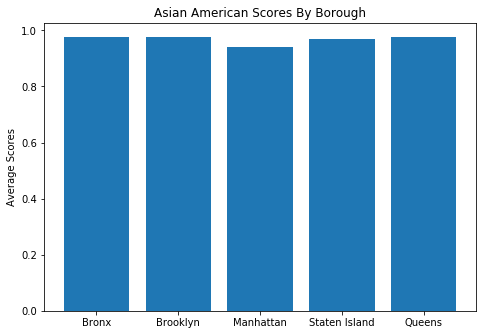

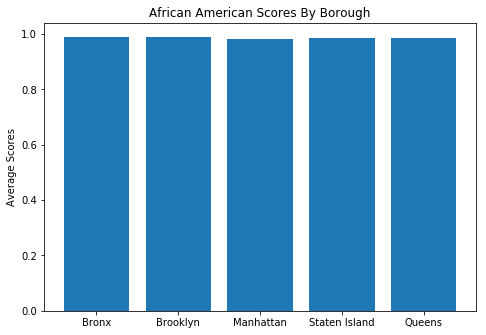

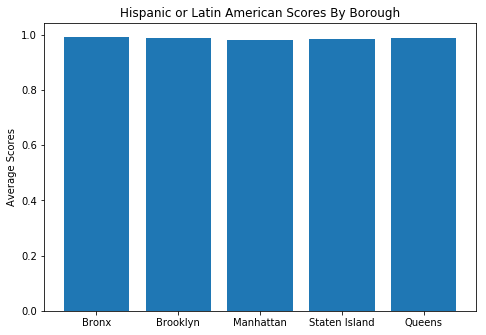

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Average Scores')
ax.set_title('Asian American Scores By Borough')
asian_data = avg_asian
ax.bar(boroughs,asian_data)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
black_data = avg_black
ax.set_ylabel('Average Scores')
ax.set_title('African American Scores By Borough')
ax.bar(boroughs,black_data)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Average Scores')
ax.set_title('Hispanic or Latin American Scores By Borough')
hispanic_data = avg_hispanic
ax.bar(boroughs,hispanic_data)
plt.show()


## Education Plots for Each Subgroup by Borough

### Black Subgroups

In [33]:
df_edu_asian.head()

,Label,Albany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Clinton County,Dutchess County,...,Schenectady County,Steuben County,Suffolk County,Sullivan County,Tompkins County,Ulster County,Warren County,Wayne County,Westchester County,Degree
0,Total:,12606,38188,3732,NaN,NaN,NaN,NaN,NaN,NaN,...,5354,NaN,39634,NaN,NaN,NaN,NaN,NaN,43827,Total
1,Less than 9th grade,1296,4615,1007,NaN,NaN,NaN,NaN,NaN,NaN,...,242,NaN,2449,NaN,NaN,NaN,NaN,NaN,71,1
2,"9th to 12th grade, no diploma",662,3468,98,NaN,NaN,NaN,NaN,NaN,NaN,...,448,NaN,1837,NaN,NaN,NaN,NaN,NaN,927,2
3,Regular high school diploma,2034,6204,937,NaN,NaN,NaN,NaN,NaN,NaN,...,989,NaN,5255,NaN,NaN,NaN,NaN,NaN,1428,3
4,GED or alternative credential,24,1301,114,NaN,NaN,NaN,NaN,NaN,NaN,...,254,NaN,77,NaN,NaN,NaN,NaN,NaN,360,4


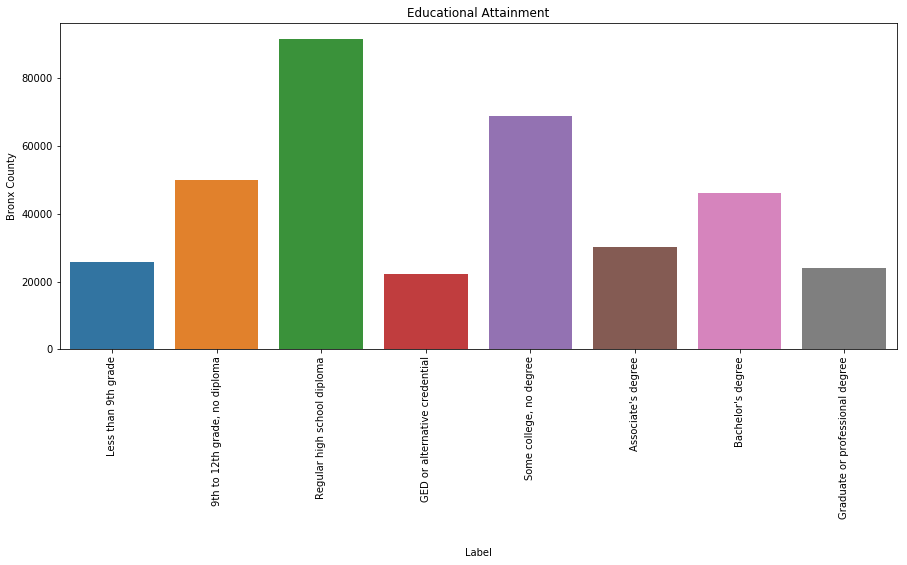

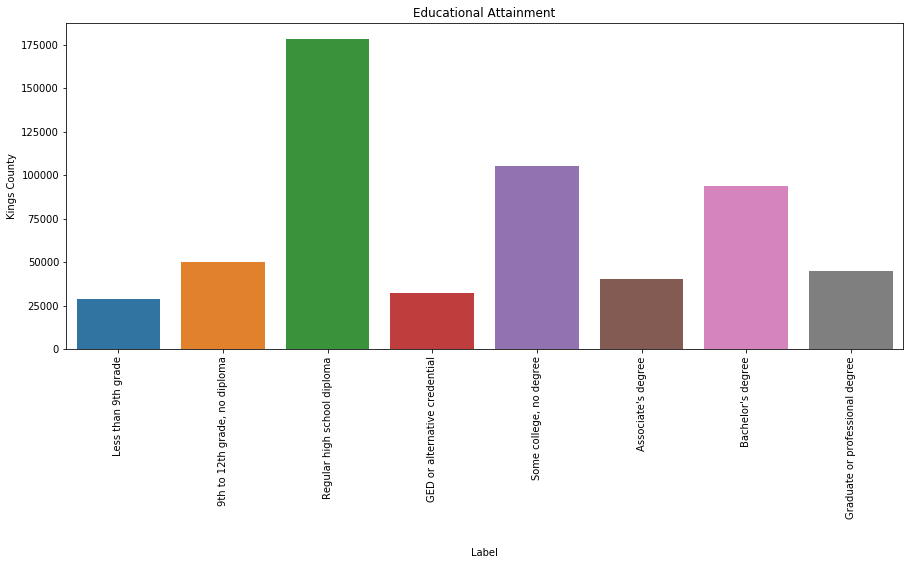

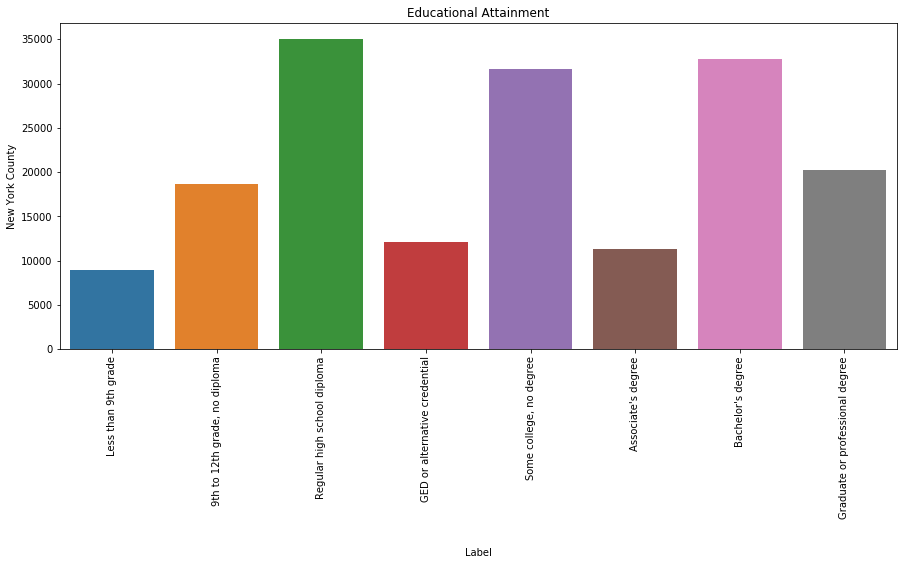

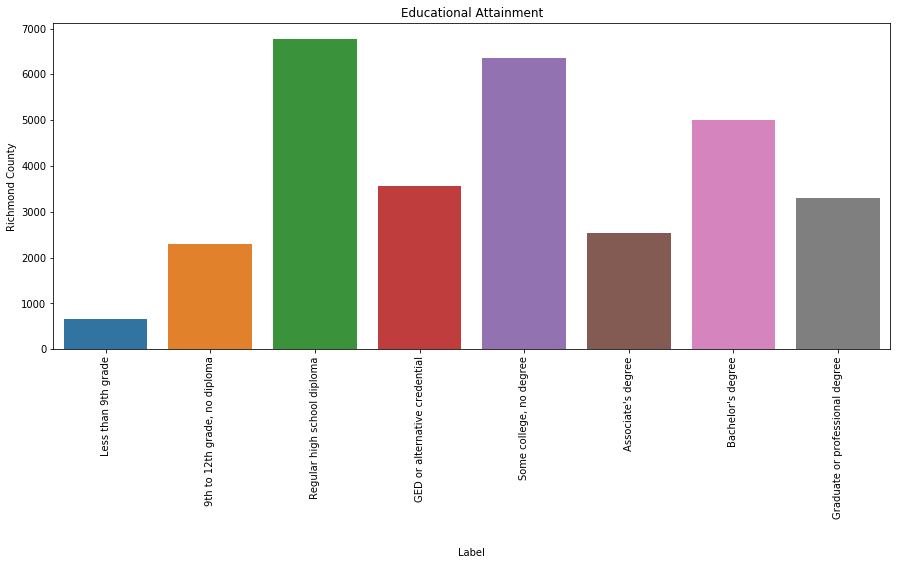

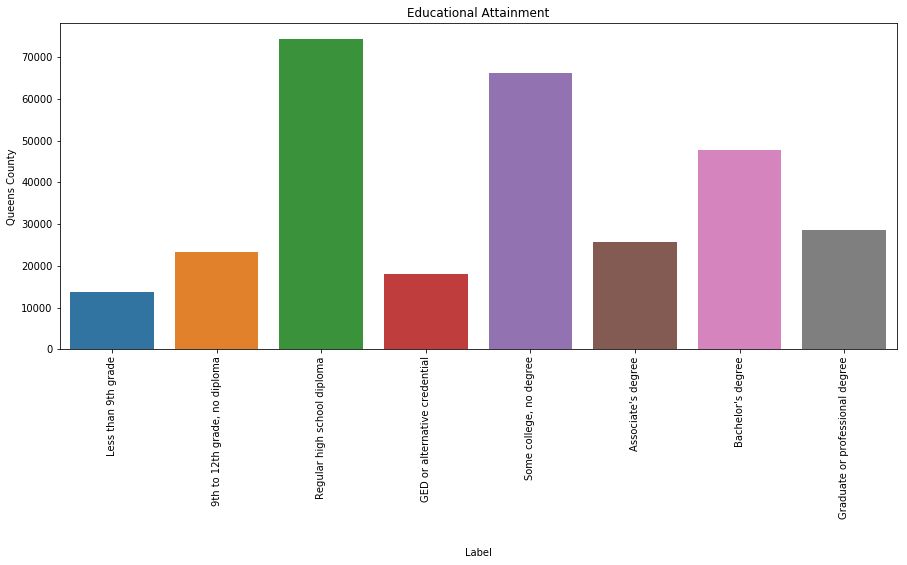

In [34]:
df_edu_black = df_1_copy.iloc[1:] #ignores the first row of our education DataFrame that included the totals of each subgroup

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_black, x = "Label", y = "Bronx County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_black, x = "Label", y = "Kings County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_black, x = "Label", y = "New York County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_black, x = "Label", y = "Richmond County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_black, x = "Label", y = "Queens County").set_title("Educational Attainment")



### Asian Subgroup

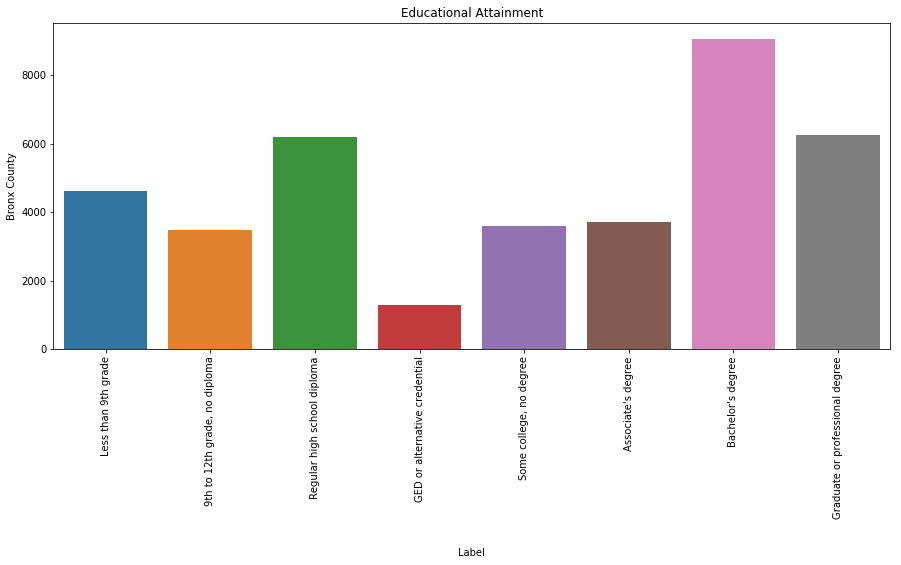

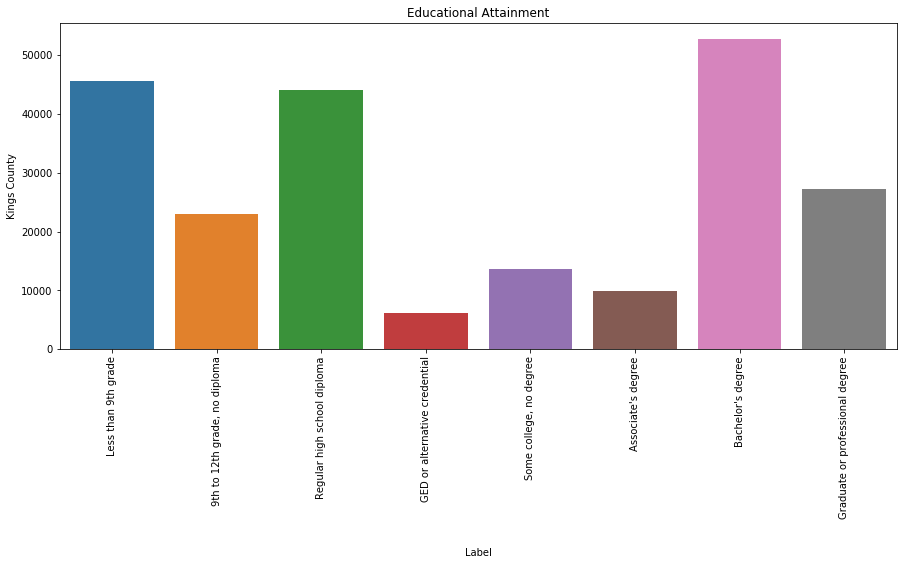

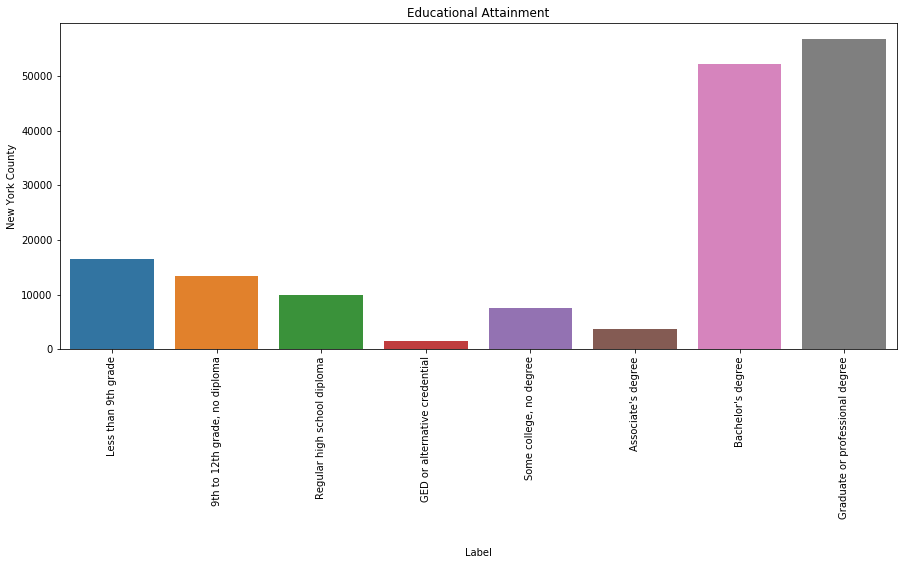

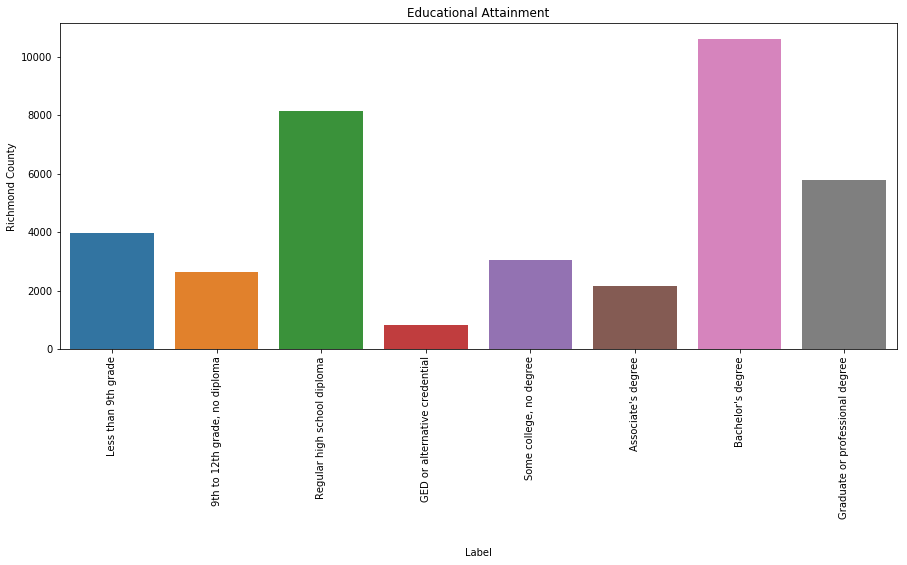

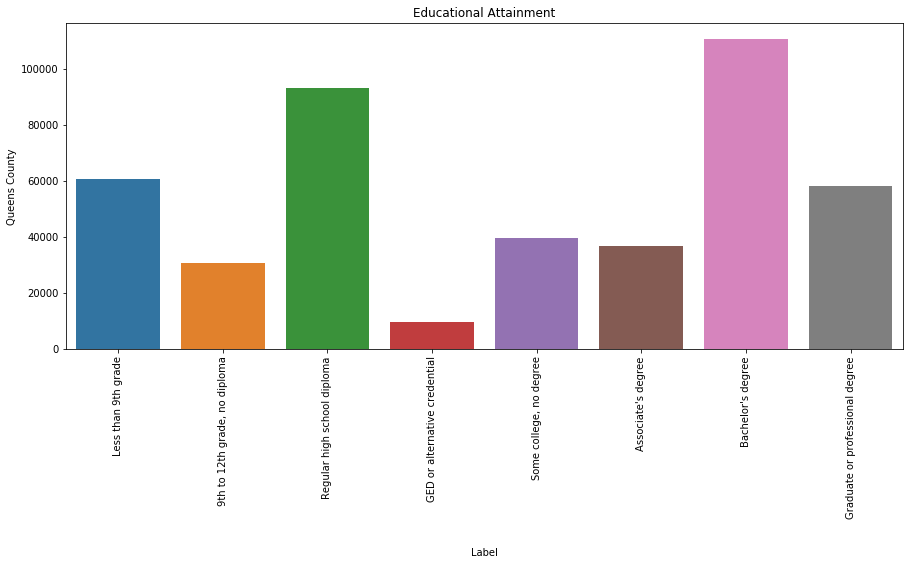

In [35]:
df_edu_asian = df_edu_asian.iloc[1:] #ignores the first row of our education DataFrame that included the totals of each subgroup

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_asian, x = "Label", y = "Bronx County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_asian, x = "Label", y = "Kings County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_asian, x = "Label", y = "New York County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_asian, x = "Label", y = "Richmond County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_asian, x = "Label", y = "Queens County").set_title("Educational Attainment")



### Hispanic Subgroup

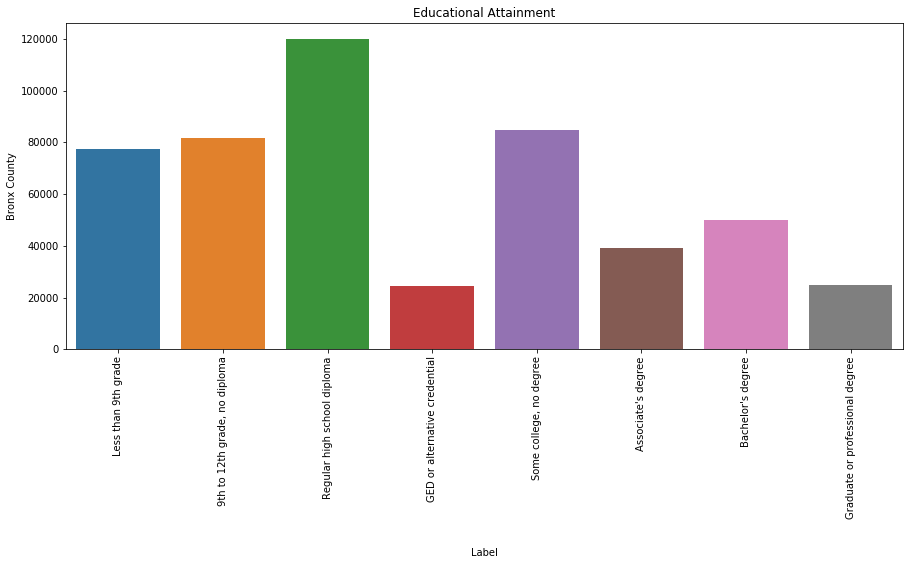

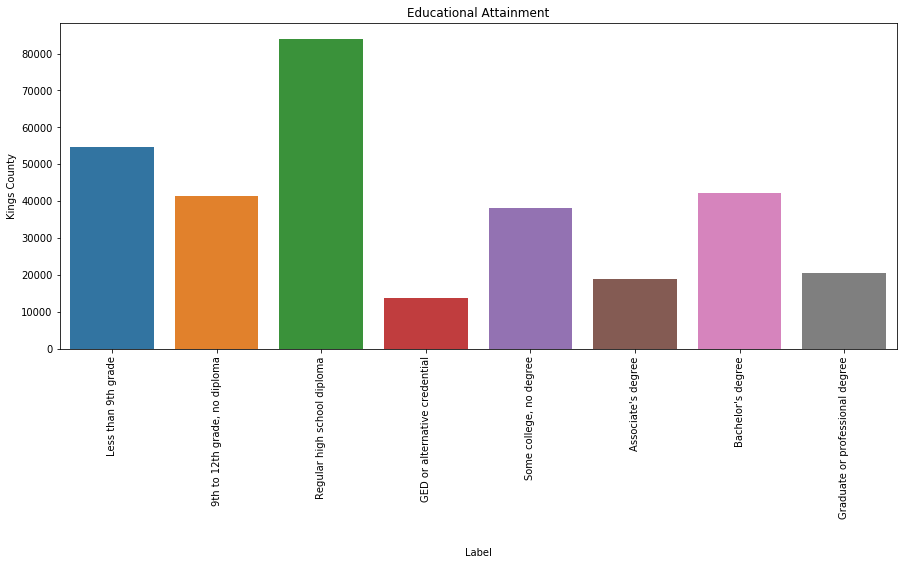

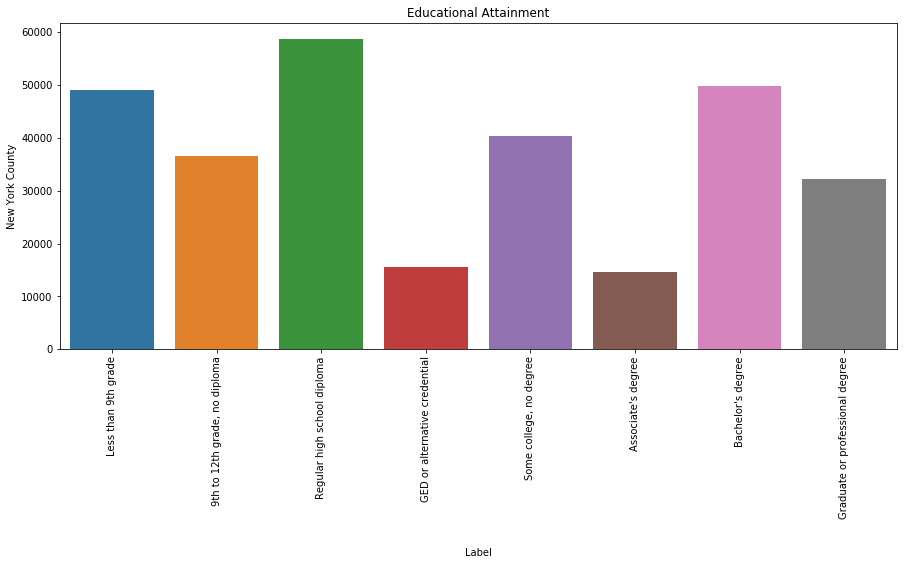

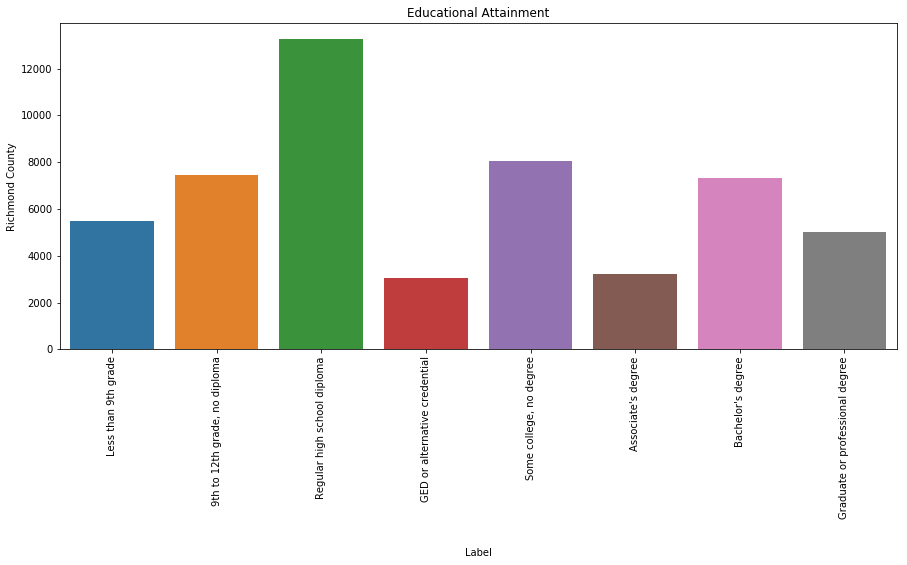

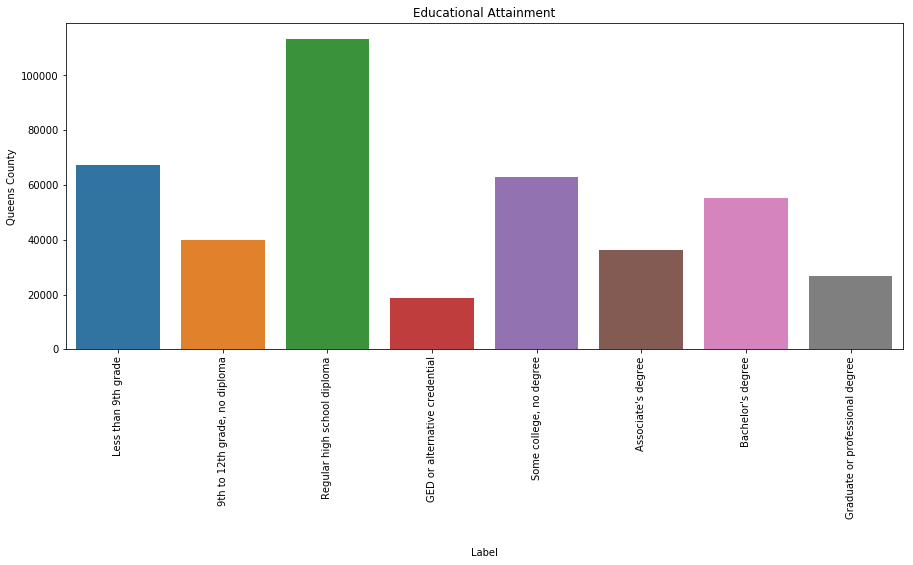

In [36]:
df_edu_hispanic = df_edu_hispanic.iloc[1:] #ignores the first row of our education DataFrame that included the totals of each subgroup

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_hispanic, x = "Label", y = "Bronx County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_hispanic, x = "Label", y = "Kings County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_hispanic, x = "Label", y = "New York County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_hispanic, x = "Label", y = "Richmond County").set_title("Educational Attainment")

plt.figure(figsize=(15, 6))
plt.xticks(rotation = "vertical")
ax = sns.barplot(data = df_edu_hispanic, x = "Label", y = "Queens County").set_title("Educational Attainment")